# Proyek Analisis Data: Indek Air Quality
- Nama: Teduh Afriyoko
- Email: teduhafr@gmail.com
- Id Dicoding:teduhafr

## Menentukan Pertanyaan Bisnis
- Bagaimana kualitas udara PM2.5 dan PM10 di kota-kota selama tahun 2013 - 2017? 
- Bagaimana kualitas udara (PM2.5 dan PM10) bila dilihat per jam atau per waktu (pagi, siang, sore malam)?



### Data Wragling
#### Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from ipywidgets import widgets, interact, fixed

In [2]:
#karena datanya terpisah-pisah, sebelum diolah baiknya kita gabung dulu
data_df= pd.concat(map(pd.read_csv, glob.glob(os.path.join('./data/', "*.csv"))))

In [3]:
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Assessing Data

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175320 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    171476 non-null  float64
 6   PM10     172382 non-null  float64
 7   SO2      171890 non-null  float64
 8   NO2      170136 non-null  float64
 9   CO       165061 non-null  float64
 10  O3       169946 non-null  float64
 11  TEMP     175154 non-null  float64
 12  PRES     175160 non-null  float64
 13  DEWP     175154 non-null  float64
 14  RAIN     175158 non-null  float64
 15  wd       174800 non-null  object 
 16  WSPM     175192 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 25.4+ MB


In [5]:
#terdapat beberapa data yang tidak sama, karena jumlahnya besar akan dihapus data-data yang kosong.

In [6]:
#mencari data yang duplikat
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
#lihat data statistiknya
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,175320.000000,175320.00000,175320.000000,175320.000000,175320.000000,171476.000000,172382.000000,171890.000000,170136.000000,165061.000000,169946.000000,175154.000000,175160.000000,175154.000000,175158.000000,175192.000000
mean,17532.500000,2014.66256,6.522930,15.729637,11.500000,77.799974,101.572651,16.042345,48.554262,1183.408479,59.166284,13.642569,1010.353251,2.341245,0.063920,1.797071
std,10122.133783,1.17720,3.448713,8.800117,6.922206,79.436749,90.510711,21.511385,34.701323,1132.271056,56.516353,11.397480,10.523491,13.785600,0.825655,1.264589
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.00000,4.000000,8.000000,5.750000,19.000000,34.000000,3.000000,22.000000,500.000000,14.000000,3.200000,1001.800000,-9.100000,0.000000,1.000000
50%,17532.500000,2015.00000,7.000000,16.000000,11.500000,53.000000,78.000000,8.000000,41.000000,800.000000,48.000000,14.600000,1010.000000,2.900000,0.000000,1.500000
75%,26298.250000,2016.00000,10.000000,23.000000,17.250000,109.000000,141.000000,20.000000,68.621525,1500.000000,84.000000,23.300000,1018.700000,14.900000,0.000000,2.300000
max,35064.000000,2017.00000,12.000000,31.000000,23.000000,898.000000,999.000000,341.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


### Cleaning Data


In [8]:
#menghapus data yang kosong
data_df = data_df.dropna(how='any')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 158403 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       158403 non-null  int64  
 1   year     158403 non-null  int64  
 2   month    158403 non-null  int64  
 3   day      158403 non-null  int64  
 4   hour     158403 non-null  int64  
 5   PM2.5    158403 non-null  float64
 6   PM10     158403 non-null  float64
 7   SO2      158403 non-null  float64
 8   NO2      158403 non-null  float64
 9   CO       158403 non-null  float64
 10  O3       158403 non-null  float64
 11  TEMP     158403 non-null  float64
 12  PRES     158403 non-null  float64
 13  DEWP     158403 non-null  float64
 14  RAIN     158403 non-null  float64
 15  wd       158403 non-null  object 
 16  WSPM     158403 non-null  float64
 17  station  158403 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 23.0+ MB


### Exploratory Data Analysis (EDA)
#### Explore

In [9]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000,158403.000000
mean,18110.804499,2014.734330,6.454303,15.708825,11.537269,77.286420,101.487084,15.686925,48.418065,1181.081848,59.119149,13.612067,1010.424364,2.259291,0.064489,1.805144
std,9941.515283,1.150802,3.444856,8.778941,6.941360,78.580262,90.063989,21.018972,34.681722,1130.601426,56.602317,11.374537,10.475543,13.749066,0.818508,1.258996
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,9958.000000,2014.000000,3.000000,8.000000,6.000000,19.000000,34.000000,3.000000,21.000000,500.000000,13.000000,3.285000,1002.000000,-9.200000,0.000000,1.000000
50%,18327.000000,2015.000000,6.000000,16.000000,12.000000,52.000000,78.000000,8.000000,41.000000,800.000000,48.000000,14.600000,1009.900000,2.800000,0.000000,1.500000
75%,26577.500000,2016.000000,9.000000,23.000000,18.000000,108.000000,141.000000,20.000000,68.000000,1500.000000,84.000000,23.200000,1018.800000,14.800000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,713.000000,992.000000,310.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


In [10]:
#mencari corelation di seluruh field
data_df.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968197,0.065711,0.018419,-0.003610,-0.026199,-0.039458,-0.229704,-0.019802,0.043135,-0.054957,-0.135273,0.203398,-0.112144,0.004848,0.058931
year,0.968197,1.000000,-0.185154,-0.007976,-0.003774,-0.029008,-0.031962,-0.172420,-0.035905,0.029554,-0.027686,-0.170331,0.203352,-0.183178,0.000264,0.092766
month,0.065711,-0.185154,1.000000,0.021182,-0.001584,0.012269,-0.029579,-0.215733,0.064675,0.052660,-0.104743,0.149720,-0.016382,0.291262,0.018318,-0.137686
day,0.018419,-0.007976,0.021182,1.000000,-0.003752,0.001959,0.022163,-0.017758,0.004154,-0.020854,-0.002203,0.015857,0.021424,0.027703,-0.001002,-0.018825
hour,-0.003610,-0.003774,-0.001584,-0.003752,1.000000,0.012308,0.045720,0.016297,-0.011346,-0.025431,0.277330,0.140761,-0.039554,-0.009087,0.016036,0.135758
PM2.5,-0.026199,-0.029008,0.012269,0.001959,0.012308,1.000000,0.881960,0.495153,0.679237,0.791599,-0.137178,-0.119955,0.013318,0.128084,-0.014860,-0.281512
PM10,-0.039458,-0.031962,-0.029579,0.022163,0.045720,0.881960,1.000000,0.471653,0.648325,0.699496,-0.103418,-0.098027,-0.009207,0.065958,-0.027599,-0.171220
SO2,-0.229704,-0.172420,-0.215733,-0.017758,0.016297,0.495153,0.471653,1.000000,0.504226,0.554363,-0.188493,-0.339138,0.231914,-0.270084,-0.041534,-0.124706
NO2,-0.019802,-0.035905,0.064675,0.004154,-0.011346,0.679237,0.648325,0.504226,1.000000,0.718243,-0.470717,-0.277931,0.193596,-0.012133,-0.038703,-0.406293
CO,0.043135,0.029554,0.052660,-0.020854,-0.025431,0.791599,0.699496,0.554363,0.718243,1.000000,-0.315719,-0.322035,0.195597,-0.051416,-0.012028,-0.296253


- karena pembahsan saya berfokus pada PM2.5 dan PM10, saya akan membahas terkait 2 ini saja
-  Jonathan Sarwono hubungan korelasi adalah sebagai berikut :
- 0 : Tidak ada korelasi
- 0.00 - 0.25 : korelasi sangat lemah
- 0.25 - 0.50 : korelasi cukup
- 0.50 - 0.75 : korleasi kuat
- 0.75 - 0.99 : korelasi sangat kuat
- 1 : korelasi sempurna

##### PM2.5
- bisa kita lihat PM2.5 dan PM10 berkorelasi 0.88, jadi ini sangat kuat
- PM2.5 juga memiliki korelasi  untuk NO2 (kuat) dan CO (sangat kuat), 

##### PM10
- memiliki korelasi yagn sangat kuat dengan PM2.5
- memiliki korelasi kuat untuk NO2 dan CO


### Visualization & Ecplanatory Analysis
#### Bagaimana kualitas udara PM2.5 dan PM10 di kota-kota selama tahun 2013 - 2017

In [11]:
#melihat data keseluruhan dulu secara umum per tahun secara rata - rata
# gabung dulu tahun dan bulan 
data_df['bantuan'] = '-'
data_df['yearmonth'] = data_df['year'].astype(str) + data_df['bantuan'] + data_df['month'].astype(str)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,bantuan,yearmonth
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-,2013-3
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,-,2013-3
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-,2013-3
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-,2013-3
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,-,2013-3


In [12]:
#hapus kolom bantuan
data_df.drop('bantuan', axis=1, inplace=True)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,yearmonth
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-3
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-3
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-3
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-3
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-3


In [13]:
data_pertahun_perbulan = data_df.groupby(['station', 'yearmonth']).agg({'PM2.5': 'mean', 'PM10': 'mean'})
print(data_pertahun_perbulan)

                             PM2.5        PM10
station      yearmonth                        
Aotizhongxin 2013-10     95.896755  119.719764
             2013-11     50.157303   77.231461
             2013-12     87.172764  121.686992
             2013-3     114.719755  148.294028
             2013-4      58.616099  104.509288
...                            ...         ...
Guanyuan     2016-7      74.164204   83.451560
             2016-8      48.761317   65.392318
             2016-9      57.438650   76.673313
             2017-1     112.710720  131.474302
             2017-2      72.134281   89.921011

[238 rows x 2 columns]


### Data PM2.5

<function matplotlib.pyplot.show(close=None, block=None)>

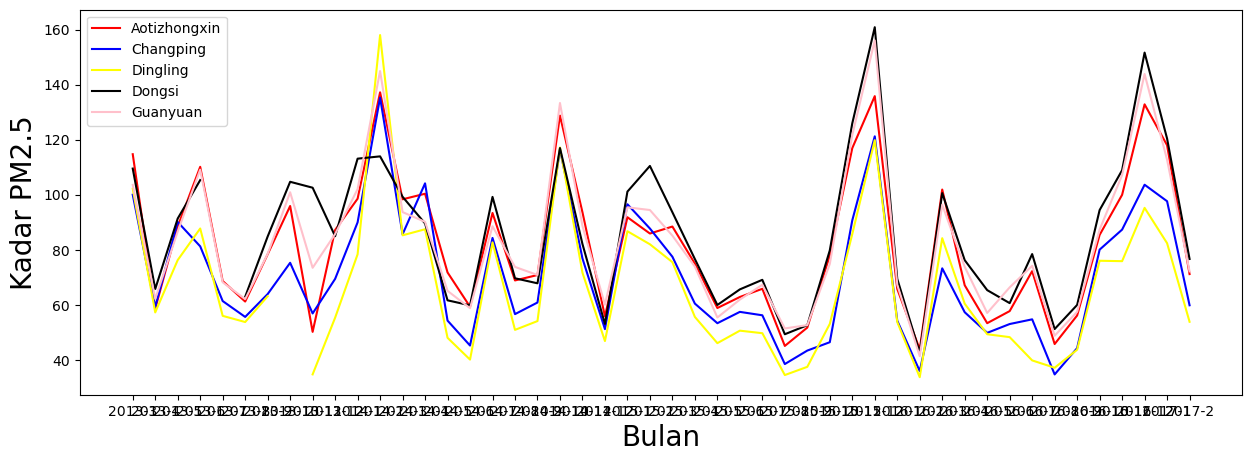

In [14]:
#buat visualisasinya untuk PM2.5
data_pivot_pm25 = data_df.pivot_table('PM2.5', ['year', 'month', 'yearmonth'], 'station', aggfunc='mean').reset_index()
plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm25['yearmonth'], data_pivot_pm25['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('Bulan',size= 20)
plt.ylabel('Kadar PM2.5', size = 20)
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

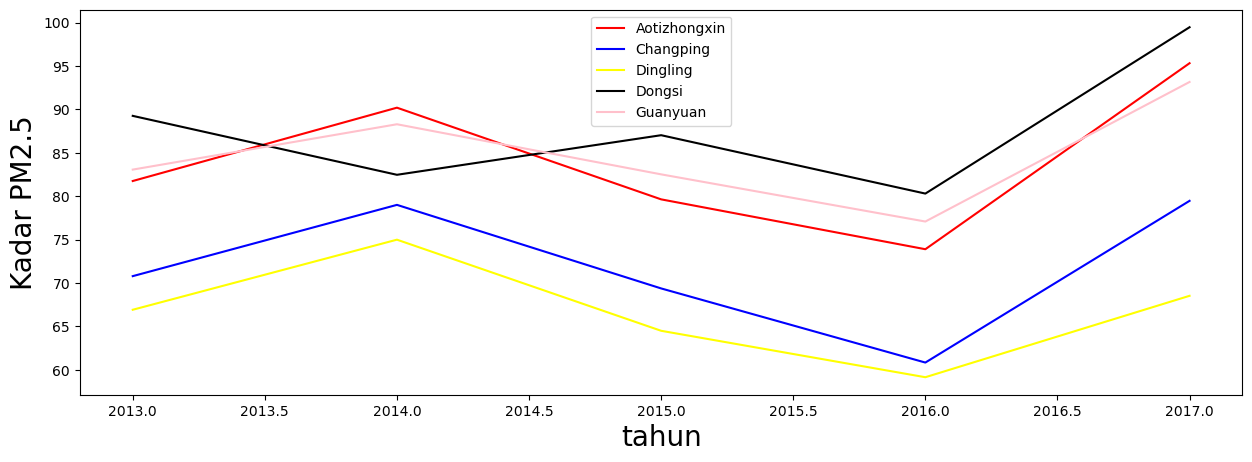

In [15]:
#untuk mempermudah perbandingan akan kita buat data pertahun untuk bisa melihatnya dengan mudah
data_pivot_pm25_tahun = data_df.pivot_table('PM2.5', 'year', 'station', aggfunc='mean').reset_index()

plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm25_tahun['year'], data_pivot_pm25_tahun['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm25_tahun['year'], data_pivot_pm25_tahun['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm25_tahun['year'], data_pivot_pm25_tahun['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm25_tahun['year'], data_pivot_pm25_tahun['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm25_tahun['year'], data_pivot_pm25_tahun['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('tahun',size= 20)

plt.ylabel('Kadar PM2.5', size = 20)
plt.legend()
plt.show

In [16]:
#dari tabel di atas bisa kita lihat kualitas udara (PM2.5) sepanajng tahun 2013 - 2017 di 5 kota.

In [17]:
## untuk lebih detail dan menarik kita bisa membuat dat per tahun dengan filter. 

def pilihTahun(tahun):
    data_pivot_pm25_filter = data_pivot_pm25[(data_pivot_pm25.year == tahun)]
    plt.figure(figsize=(12, 5))
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Aotizhongxin'], label = 'Aotizhongxin', color='red')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Changping'], label = 'Changping', color='blue')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Dingling'], label = 'Dingling', color='yellow')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Dongsi'], label = 'Dongsi', color='black')
    plt.plot(data_pivot_pm25_filter['month'], data_pivot_pm25_filter['Guanyuan'], label = 'Guanyuan', color='pink')
    plt.xlabel('Bulan',size= 20)
    plt.ylabel('Kadar PM2.5', size = 20)
    judul  = 'Data Kulatias PM 2.5 Kota Tahun ' + str(tahun) +  '\n makin kecil makin bagus'
    plt.title(judul , fontsize=15)
    plt.legend()
    plt.show


interact(pilihTahun, tahun=list(data_pivot_pm25['year'].unique()))  




interactive(children=(Dropdown(description='tahun', options=(2013, 2014, 2015, 2016, 2017), value=2013), Outpu…

<function __main__.pilihTahun(tahun)>

### Data PM10

In [18]:
# untuk PM 2.5 kita sudah bisa melihat data tiap kota sampai per tahun, berikutnya akan kita akan olah di PM 10

<function matplotlib.pyplot.show(close=None, block=None)>

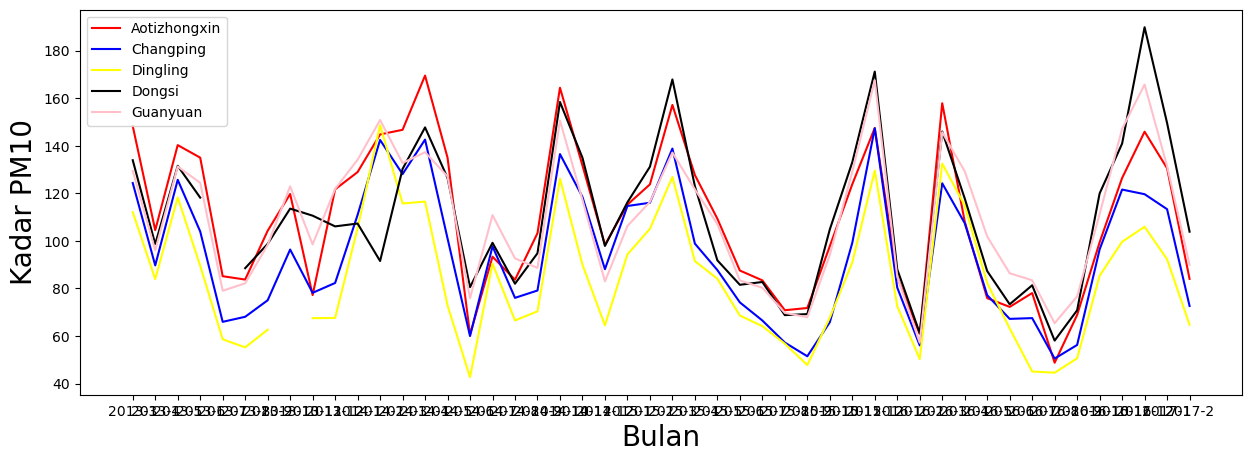

In [19]:
#buat visualisasinya untuk PM10
data_pivot_pm10 = data_df.pivot_table('PM10', ['year', 'month', 'yearmonth'], 'station', aggfunc='mean').reset_index()
plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm10['yearmonth'], data_pivot_pm10['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm10['yearmonth'], data_pivot_pm10['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm10['yearmonth'], data_pivot_pm10['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm10['yearmonth'], data_pivot_pm10['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm10['yearmonth'], data_pivot_pm10['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('Bulan',size= 20)
plt.ylabel('Kadar PM10', size = 20)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

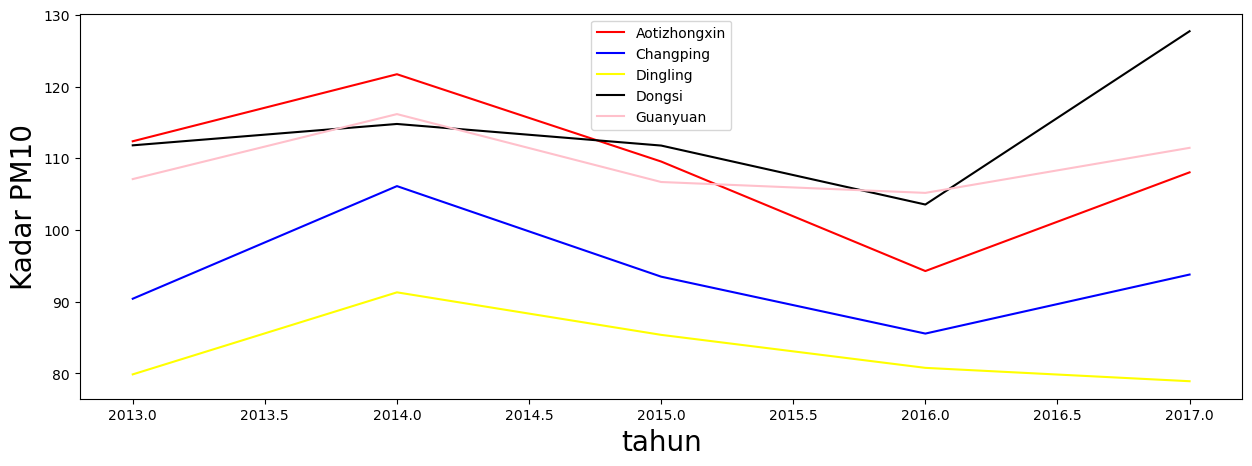

In [20]:
#untuk mempermudah perbandingan akan kita buat data pertahun untuk bisa melihatnya dengan mudah
data_pivot_pm10_tahun = data_df.pivot_table('PM10', 'year', 'station', aggfunc='mean').reset_index()

plt.figure(figsize=(15, 5))
plt.plot(data_pivot_pm10_tahun['year'], data_pivot_pm10_tahun['Aotizhongxin'], label = 'Aotizhongxin', color='red')
plt.plot(data_pivot_pm10_tahun['year'], data_pivot_pm10_tahun['Changping'], label = 'Changping', color='blue')
plt.plot(data_pivot_pm10_tahun['year'], data_pivot_pm10_tahun['Dingling'], label = 'Dingling', color='yellow')
plt.plot(data_pivot_pm10_tahun['year'], data_pivot_pm10_tahun['Dongsi'], label = 'Dongsi', color='black')
plt.plot(data_pivot_pm10_tahun['year'], data_pivot_pm10_tahun['Guanyuan'], label = 'Guanyuan', color='pink')
plt.xlabel('tahun',size= 20)

plt.ylabel('Kadar PM10', size = 20)
plt.legend()
plt.show

In [21]:
## untuk lebih detail dan menarik kita bisa membuat dat per tahun dengan filter. 

def pilihTahunPM10(tahun):
    data_pivot_pm10_filter = data_pivot_pm10[(data_pivot_pm10.year == tahun)]
    plt.figure(figsize=(12, 5))
    plt.plot(data_pivot_pm10_filter['month'], data_pivot_pm10_filter['Aotizhongxin'], label = 'Aotizhongxin', color='red')
    plt.plot(data_pivot_pm10_filter['month'], data_pivot_pm10_filter['Changping'], label = 'Changping', color='blue')
    plt.plot(data_pivot_pm10_filter['month'], data_pivot_pm10_filter['Dingling'], label = 'Dingling', color='yellow')
    plt.plot(data_pivot_pm10_filter['month'], data_pivot_pm10_filter['Dongsi'], label = 'Dongsi', color='black')
    plt.plot(data_pivot_pm10_filter['month'], data_pivot_pm10_filter['Guanyuan'], label = 'Guanyuan', color='pink')
    plt.xlabel('Bulan',size= 20)
    plt.ylabel('Kadar PM10', size = 20)
    judul  = 'Data Kulatias PM10 Kota Tahun ' + str(tahun) +  '\n makin kecil makin bagus'
    plt.title(judul , fontsize=15)
    plt.legend()
    plt.show


interact(pilihTahunPM10, tahun=list(data_pivot_pm25['year'].unique()))

interactive(children=(Dropdown(description='tahun', options=(2013, 2014, 2015, 2016, 2017), value=2013), Outpu…

<function __main__.pilihTahunPM10(tahun)>

### Bagaimana kualitas udara (PM2.5 dan PM10) bila dilihat per jam atau per waktu (pagi, siang, sore malam)?

##### PM2.5


In [22]:
data_pivot_perjam = data_df.pivot_table(['PM2.5', 'PM10'], 'hour', aggfunc='mean').reset_index()


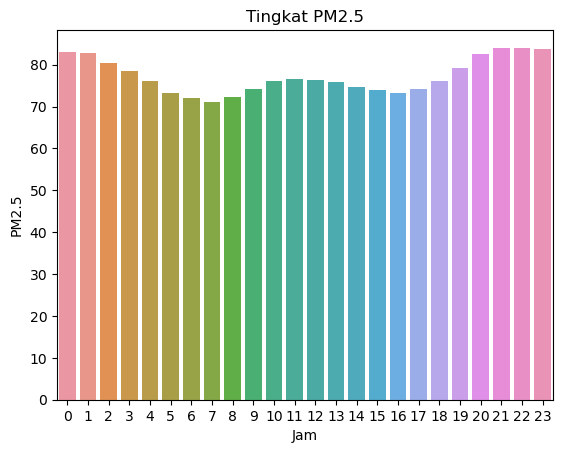

In [23]:
sns.barplot(y=data_pivot_perjam["PM2.5"], x=data_pivot_perjam["hour"])
plt.xlabel("Jam")
plt.title("Tingkat PM2.5")
plt.show()

In [24]:
#bia kita lihat tingkat terendah di 7, tetapi justru naik di malam hari. dari pukul 18 - 6 pagi itu naik. 
#kita buat lebih komprehensif dengan melihat berdasarkan tahun supaya bisa membandungkan
kota_perjam = data_df.pivot_table(['PM2.5', 'PM10'], ['hour', 'yearmonth', 'station', 'year'], aggfunc='mean').reset_index()

In [25]:
#kota, bulan, jam

<function matplotlib.pyplot.show(close=None, block=None)>

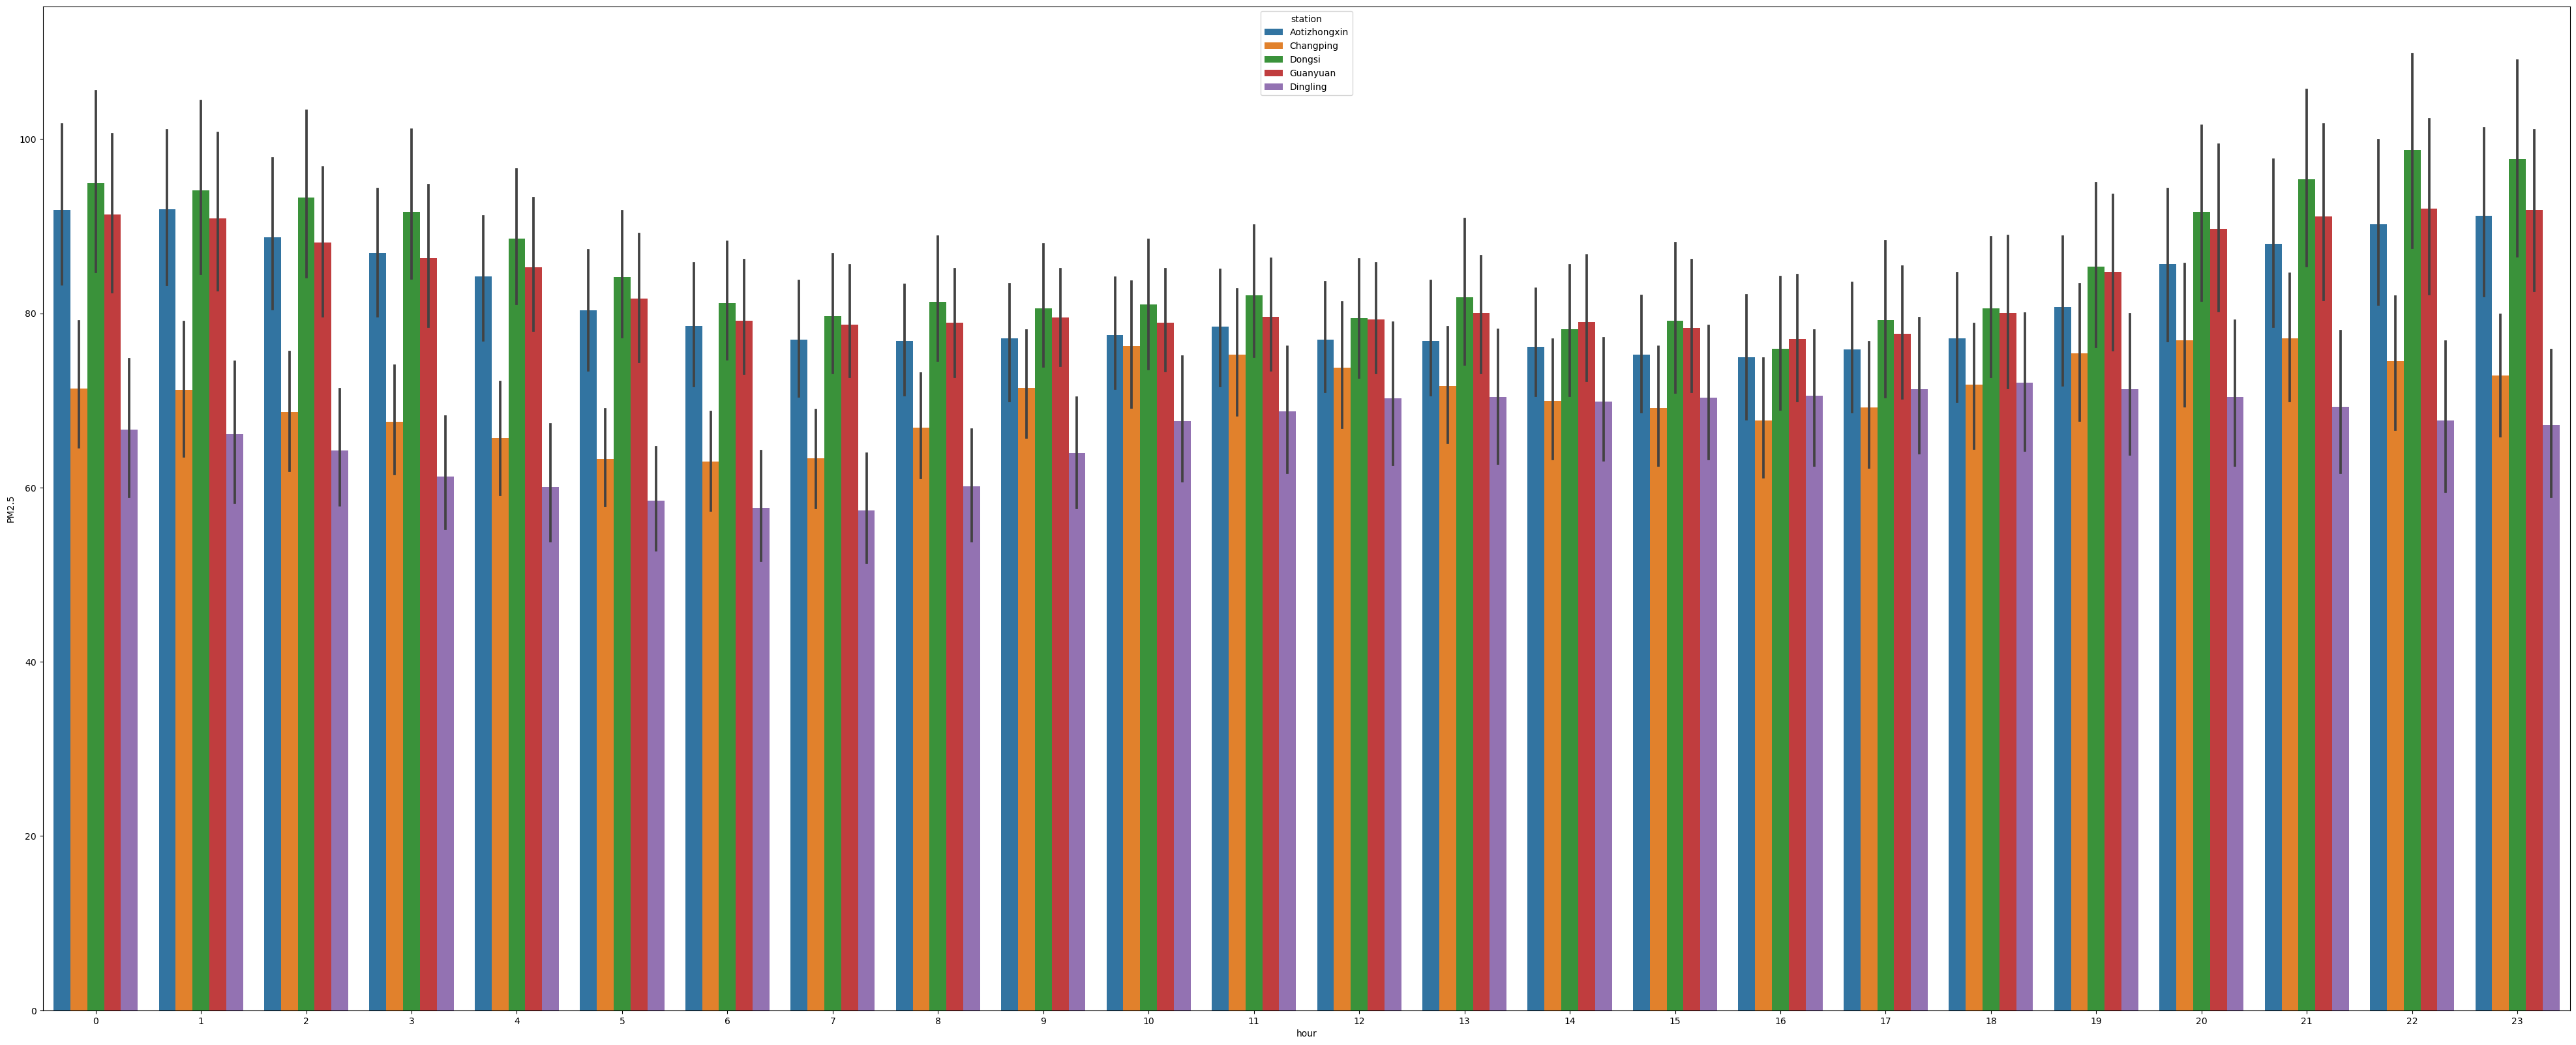

In [26]:
#mengelompokan per jam per kota
plt.figure(figsize=(50, 20))
sns.barplot(data=kota_perjam, x = 'hour', y = 'PM2.5', hue = 'station')
plt.show

data jam terlalu panjang karena sampai 24 jam. kita akan bagi menjadi seperti berikut \
- pagi jam 5 - 10
- siang jam 11 - 15
- sore jam 16 - 18
- malam jam 19 - 4


In [27]:
data_df.loc[(data_df.hour >= 5) & (data_df.hour <= 10) , 'waktu'] = 'pagi'
data_df.loc[(data_df.hour >= 11) & (data_df.hour <= 15) , 'waktu'] = 'siang'
data_df.loc[(data_df.hour >= 16) & (data_df.hour <= 18) , 'waktu'] = 'sore'
data_df.loc[(data_df.hour >= 19) | (data_df.hour <= 4) , 'waktu'] = 'malam'

In [28]:
kota_perjam = data_df.pivot_table(['PM2.5', 'PM10'], ['hour', 'yearmonth', 'station', 'year', 'waktu'], aggfunc='mean').reset_index()
kota_perjam.head()

,hour,yearmonth,station,year,waktu,PM10,PM2.5
0,0,2013-10,Aotizhongxin,2013,malam,155.827586,127.965517
1,0,2013-10,Changping,2013,malam,82.304348,68.739130
2,0,2013-10,Dongsi,2013,malam,141.137931,136.344828
3,0,2013-10,Guanyuan,2013,malam,143.500000,130.250000
4,0,2013-11,Aotizhongxin,2013,malam,98.615385,75.769231


<function matplotlib.pyplot.show(close=None, block=None)>

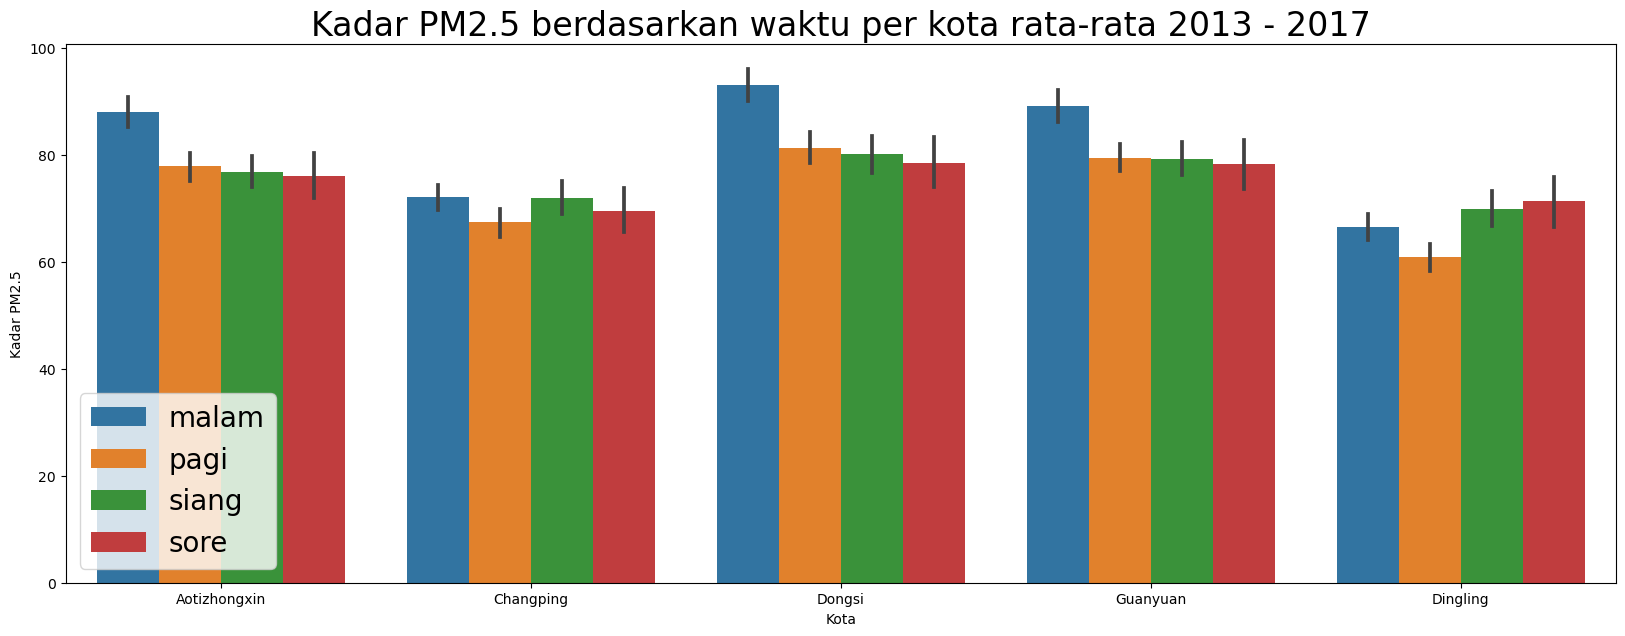

In [29]:
plt.figure(figsize=(20, 7))
sns.barplot(data=kota_perjam, x = 'station', y = 'PM2.5', hue = 'waktu')
plt.rcParams.update({'font.size': 20})
plt.legend()
plt.xlabel('Kota')
plt.ylabel('Kadar PM2.5')
plt.title('Kadar PM2.5 berdasarkan waktu per kota rata-rata 2013 - 2017')
plt.show

##### terlihat bahwa PM2.5 tertinggi di  malam hari untuk station Aotizhongzin, Changping, Dongsi, Guanyan sedangkan Dinglind di sore hari
##### data PM10 terendah pagi hari ada di kota Changping dan Dingling, sore hari ada di Aotizhongzin, Dongsi, Guanyuan

#### PM10


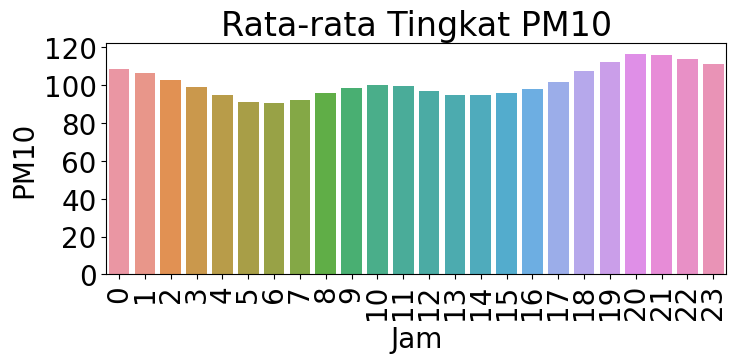

In [30]:
plt.figure(figsize=(8, 3))
sns.barplot(y=data_pivot_perjam["PM10"], x=data_pivot_perjam["hour"])
plt.xlabel("Jam")
plt.title("Rata-rata Tingkat PM10")
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation='vertical')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

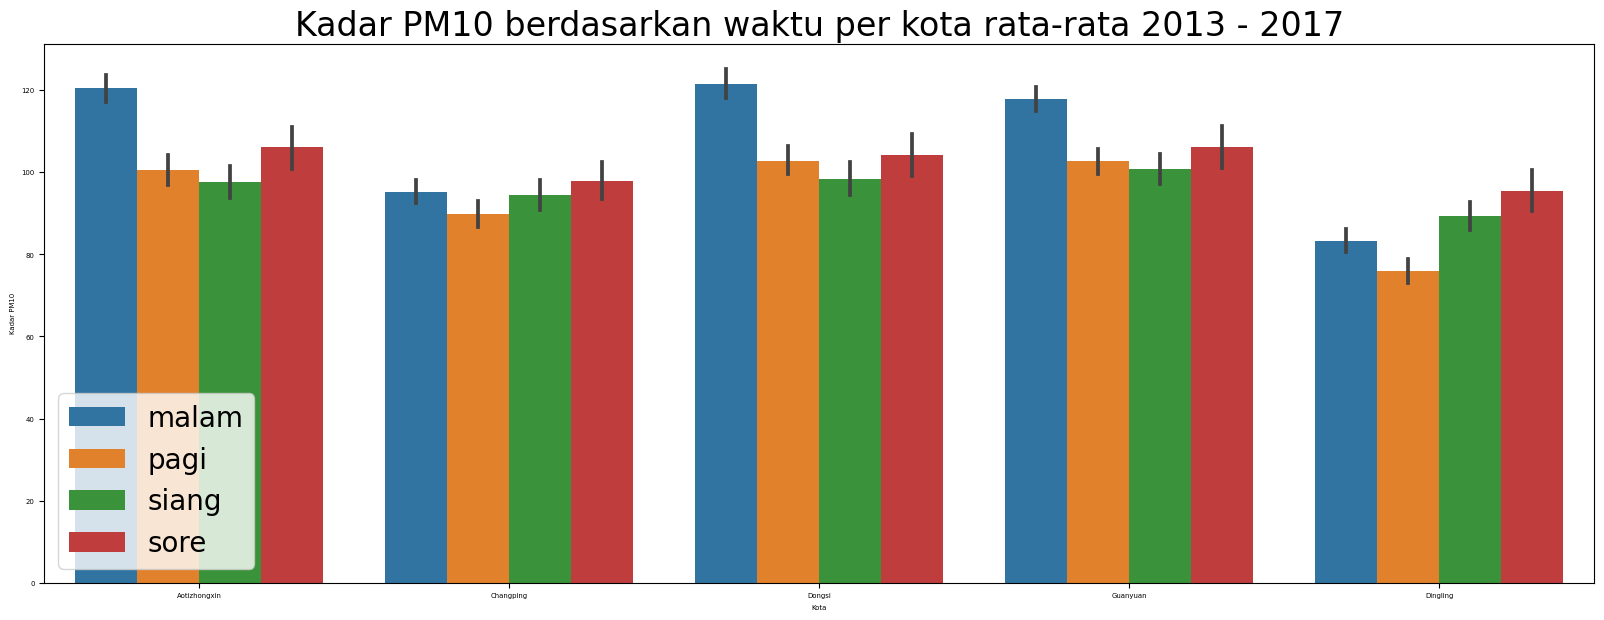

In [31]:
#buat tabel PM 10 berdasarkan kota
plt.figure(figsize=(20, 7))
sns.barplot(data=kota_perjam, x = 'station', y = 'PM10', hue = 'waktu')
plt.rcParams.update({'font.size': 20})
plt.legend()
plt.xlabel('Kota')
plt.ylabel('Kadar PM10')
plt.title('Kadar PM10 berdasarkan waktu per kota rata-rata 2013 - 2017')
plt.show

##### terlihat bahwa PM10 tertinggi di  malam hari untuk station Aotizhongzin, Changping, Dongsi, sedangkan Dinglind di malam hari
##### data PM10 terendah siang hari ada di kota Aotizhongzin, Dongsi dan Guanyuan, sedangkan Changping dan Dingling ada di pagi hari

### Visualisasi interaktif untuk memilih waktu terbaik dan terburuk kadar 

In [32]:
 
def pilihWaktu(Data, Awal, Akhir):
    if Awal > Akhir:
        return "Tahun Awal tidak boleh lebih besar dari tahun akhir"
    elif Data== 'PM2.5':
        tahun_dipakai = kota_perjam.drop(kota_perjam[(kota_perjam.year < Awal) | (kota_perjam.year > Akhir)].index)
        kota_perjam_byyear=tahun_dipakai.pivot_table('PM2.5', ['year', 'waktu', 'yearmonth', 'station'], aggfunc='mean').reset_index()
        plt.figure(figsize=(20, 7))
        sns.barplot(data=kota_perjam_byyear, x = 'station', y = 'PM2.5', hue = 'waktu')
        plt.rcParams.update({'font.size': 20})
        plt.legend()
        plt.xlabel('Kota')
        plt.ylabel('Kadar PM2.5')
        plt.title('Kadar PM2.5 berdasarkan waktu per kota\n  rata-rata tahun '+str(Awal)+' - '+str(Akhir))
        plt.show
    else:
        tahun_dipakai = kota_perjam.drop(kota_perjam[(kota_perjam.year < Awal) | (kota_perjam.year > Akhir)].index)
        kota_perjam_byyear=tahun_dipakai.pivot_table('PM10', ['year', 'waktu', 'yearmonth', 'station'], aggfunc='mean').reset_index()
        plt.figure(figsize=(20, 7))
        sns.barplot(data=kota_perjam_byyear, x = 'station', y = 'PM10', hue = 'waktu')
        plt.rcParams.update({'font.size': 20})
        plt.legend()
        plt.xlabel('Kota')
        plt.ylabel('Kadar PM10')
        plt.title('Kadar PM10 berdasarkan waktu per kota\n  rata-rata tahun '+str(Awal)+' - '+str(Akhir))
        plt.show

    
    

interact(pilihWaktu, Data=list(['PM2.5', 'PM10']), Awal=list(data_pivot_pm25['year'].unique()), Akhir=list(data_pivot_pm25['year'].unique())        )


interactive(children=(Dropdown(description='Data', options=('PM2.5', 'PM10'), value='PM2.5'), Dropdown(descrip…

<function __main__.pilihWaktu(Data, Awal, Akhir)>

In [33]:
#export semua data
data_df.to_csv("./dashboard/data.csv", index=False)